In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import seaborn as sns
import pandas as pd

In [5]:
terrain = pd.read_excel(r"C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\notebooks\terrain_data.xlsx")

In [157]:
#terrain = terrain.fillna(0)

In [7]:
terrain['Race Name'].unique()

array(['Amstel Gold Race', 'De Brabantse Pijl ', 'Dwars door Vlaanderen',
       'E3 Saxo Classic', 'Gent-Wevelgem', 'Il Lombardia',
       'Kuurne-Brussel-Kuurne', 'La Flèche Wallonne',
       'Liege - Bastogne - Liege', 'Milano-Sanremo',
       'Omloop Het Nieuwsblad', 'Paris-Roubaix', 'Ronde van Vlaanderen',
       'Scheldeprijs', 'Strade Bianche'], dtype=object)

In [9]:
terrain = terrain.astype({
    'Distance': int,
    'Street': int,
    'Road': int, 
    'Paved': int, 
    'Asphalt': int, 
    'Path': int,
    'Cycleway': int,
    'Unpaved': int,
    'State Road': int,
    'Cobblestones': int,
    'Unknown': int,
    'Compacted Gravel': int,
    'Off-grid (unknown)': int,
    'Singletrack': int,
    'Access Road': int,
    'Alpine': int,
    'Distance': int,
    'Net Gain': int,
    'Lowest Elevation': int,
    'Highest Elevation': int,
    'Vertical Gain': int,
    'Downhill': int
})

In [11]:
terrain.dtypes

Unnamed: 0.1           int64
Unnamed: 0             int64
PCS race entry        object
Race Name             object
Race Tags             object
Year                   int64
Distance               int32
Street                 int32
Road                   int32
Paved                  int32
Asphalt                int32
Path                   int32
Cycleway               int32
Unpaved                int32
State Road             int32
Cobblestones           int32
Unknown                int32
Compacted Gravel       int32
Off-grid (unknown)     int32
Singletrack            int32
Access Road            int32
Alpine                 int32
Net Gain               int32
Lowest Elevation       int32
Highest Elevation      int32
Vertical Gain          int32
Downhill               int32
dtype: object

In [21]:
terrain

,Unnamed: 0,PCS race entry,Race Name,Race Tags,Year,Distance,Street,Road,Paved,Asphalt,...,Compacted Gravel,Off-grid (unknown),Singletrack,Access Road,Alpine,Net Gain,Lowest Elevation,Highest Elevation,Vertical Gain,Downhill
0,94,2017 amstel gold race,Amstel Gold Race,"Spring, Adrennes",2017,261,0,0,0,0,...,0,0,0,0,0,90,41,326,3240,3150
1,95,2018 amstel gold race,Amstel Gold Race,"Spring, Adrennes",2018,261,0,0,0,0,...,0,0,0,0,0,80,42,324,3240,3160
2,96,2019 amstel gold race,Amstel Gold Race,"Spring, Adrennes",2019,266,0,0,0,0,...,0,0,0,0,0,80,42,328,3270,3190
3,97,2021 amstel gold race,Amstel Gold Race,"Spring, Adrennes",2021,216,0,0,0,0,...,0,0,0,0,0,30,55,156,2450,2420
4,98,2022 amstel gold race,Amstel Gold Race,"Spring, Adrennes",2022,249,0,0,0,0,...,0,0,0,0,0,80,42,326,3130,3050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,6,2019 strade bianche,Strade Bianche,Spring,2019,183,4,154,11,111,...,10,0,0,0,0,80,141,460,2870,2790
82,0,2020 strade bianche,Strade Bianche,Spring,2020,183,4,154,11,111,...,10,0,0,0,0,80,139,460,2870,2790
83,1,2021 strade bianche,Strade Bianche,Spring,2021,183,4,154,12,110,...,10,0,0,0,0,80,139,460,2870,2790
84,2,2022 strade bianche,Strade Bianche,Spring,2022,184,4,154,11,110,...,10,0,0,0,0,80,139,460,2870,2790


In [19]:
terrain = terrain.sort_values(by=['Race Name', 'Year'], ascending=[True, True])

In [23]:
terrain.to_excel('terrain_data.xlsx')

In [220]:
#race_name_dict = {
                'Strade Bianche': 'Strade Bianche',
                'Ronde van Vlaanderen - Tour des Flandres': 'Ronde van Vlaanderen',
                'Ronde van Vlaanderen / Tour des Flandres': 'Ronde van Vlaanderen',
                'Gent-Wevelgem in Flanders Fields': 'Gent-Wevelgem in Flanders Fields',
                'Omloop Het Nieuwsblad':'Omloop Het Nieuwsblad',
                'Scheldeprijs': 'Scheldeprijs',
                'De Brabantse Pijl - La Fleche Brabanconne': 'De Brabantse Pijl',
                'Brussels Cycling Classic': 'Brussels Cycling Classic',
                'Liege - Bastogne - Liege': 'Liege - Bastogne - Liege',
                'Dwars door Vlaanderen - A travers la Flandre': 'Dwars door Vlaanderen',
                'Dwars door Vlaanderen / A travers la Flandre': 'Dwars door Vlaanderen',
                'Milano-Sanremo': 'Milano-Sanremo',
                'E3 Binckbank Classic': 'E3 Classic',
                'E3 Saxo Bank Classic': 'E3 Classic',
                'E3 Saxo Classic': 'E3 Classic',
                'Record Bank E3 Harelbeke': 'E3 Classic',
                'La Flèche Wallonne': 'La Fleche Wallonne',
                'Milano - Torino': 'Milano-Torino',
                'Amstel Gold Race': 'Amstel Gold Race',
                'Paris-Roubaix': 'Paris-Roubaix'
}

In [222]:
#terrain['Race Name'].map(race_name_dict).unique()

array(['Amstel Gold Race', 'Brussels Cycling Classic',
       'De Brabantse Pijl', 'Dwars door Vlaanderen', 'E3 Classic', nan,
       'Gent-Wevelgem in Flanders Fields', 'La Fleche Wallonne',
       'Liege - Bastogne - Liege', 'Milano-Torino', 'Milano-Sanremo',
       'Omloop Het Nieuwsblad', 'Paris-Roubaix', 'Ronde van Vlaanderen',
       'Scheldeprijs', 'Strade Bianche'], dtype=object)

In [167]:
#for index, column_name in enumerate(terrain.columns):
    print(f"Column index: {index}, Column name: {column_name}")

Column index: 0, Column name: Unnamed: 0
Column index: 1, Column name: PCS race entry
Column index: 2, Column name: Race Name
Column index: 3, Column name: Year
Column index: 4, Column name: Distance
Column index: 5, Column name: Street
Column index: 6, Column name: Road
Column index: 7, Column name: Paved
Column index: 8, Column name: Asphalt
Column index: 9, Column name: Path
Column index: 10, Column name: Cycleway
Column index: 11, Column name: Unpaved
Column index: 12, Column name: State Road
Column index: 13, Column name: Cobblestones
Column index: 14, Column name: Unknown
Column index: 15, Column name: Compacted Gravel
Column index: 16, Column name: Off-grid (unknown)
Column index: 17, Column name: Singletrack
Column index: 18, Column name: Access Road
Column index: 19, Column name: Alpine
Column index: 20, Column name: Net Gain
Column index: 21, Column name: Lowest Elevation
Column index: 22, Column name: Highest Elevation
Column index: 23, Column name: Vertical Gain
Column inde

In [13]:
strade = terrain[terrain['Race Name'] == 'Strade Bianche']
strade

,Unnamed: 0.1,Unnamed: 0,PCS race entry,Race Name,Race Tags,Year,Distance,Street,Road,Paved,...,Compacted Gravel,Off-grid (unknown),Singletrack,Access Road,Alpine,Net Gain,Lowest Elevation,Highest Elevation,Vertical Gain,Downhill
93,79,4,2017 strade bianche,Strade Bianche,Spring,2017,175,4,152,11,...,10,0,0,0,0,80,140,457,2800,2720
94,80,5,2018 strade bianche,Strade Bianche,Spring,2018,184,4,154,12,...,10,0,0,0,0,80,141,459,2870,2790
95,81,6,2019 strade bianche,Strade Bianche,Spring,2019,183,4,154,11,...,10,0,0,0,0,80,141,460,2870,2790
96,82,0,2020 strade bianche,Strade Bianche,Spring,2020,183,4,154,11,...,10,0,0,0,0,80,139,460,2870,2790
97,83,1,2021 strade bianche,Strade Bianche,Spring,2021,183,4,154,12,...,10,0,0,0,0,80,139,460,2870,2790
98,84,2,2022 strade bianche,Strade Bianche,Spring,2022,184,4,154,11,...,10,0,0,0,0,80,139,460,2870,2790
99,85,3,2023 strade bianche,Strade Bianche,Spring,2023,184,10,121,4,...,46,0,0,0,0,80,139,460,2970,2890


In [15]:
strade.dtypes

Unnamed: 0.1           int64
Unnamed: 0             int64
PCS race entry        object
Race Name             object
Race Tags             object
Year                   int64
Distance               int32
Street                 int32
Road                   int32
Paved                  int32
Asphalt                int32
Path                   int32
Cycleway               int32
Unpaved                int32
State Road             int32
Cobblestones           int32
Unknown                int32
Compacted Gravel       int32
Off-grid (unknown)     int32
Singletrack            int32
Access Road            int32
Alpine                 int32
Net Gain               int32
Lowest Elevation       int32
Highest Elevation      int32
Vertical Gain          int32
Downhill               int32
dtype: object

In [25]:
cols = ['Street', 'Road', 'Paved', 'Asphalt', 'Path', 'Cycleway', 'Unpaved', 'State Road', 'Cobblestones', 'Compacted Gravel', 'Off-grid (unknown)',
        'Singletrack', 'Access Road', 'Alpine']

In [31]:
strade_cols = ['Street', 'Road', 'Paved', 'Asphalt', 'Unpaved', 'State Road', 'Cobblestones', 'Compacted Gravel']

In [33]:
strade_colors = {'Street': 'slategray',
          'Road': 'lightsteelblue',
          'Paved': 'darkslategrey',
          'Asphalt': 'black',
          'Unpaved': 'peru',
          'State Road': 'darkblue',
          'Cobblestones': 'maroon',
          'Compacted Gravel': 'saddlebrown'}

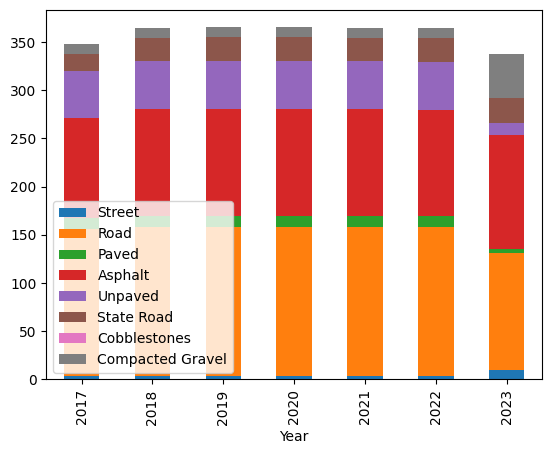

In [35]:
strade.set_index('Year')[strade_cols].plot(kind='bar', stacked=True)
plt.show()

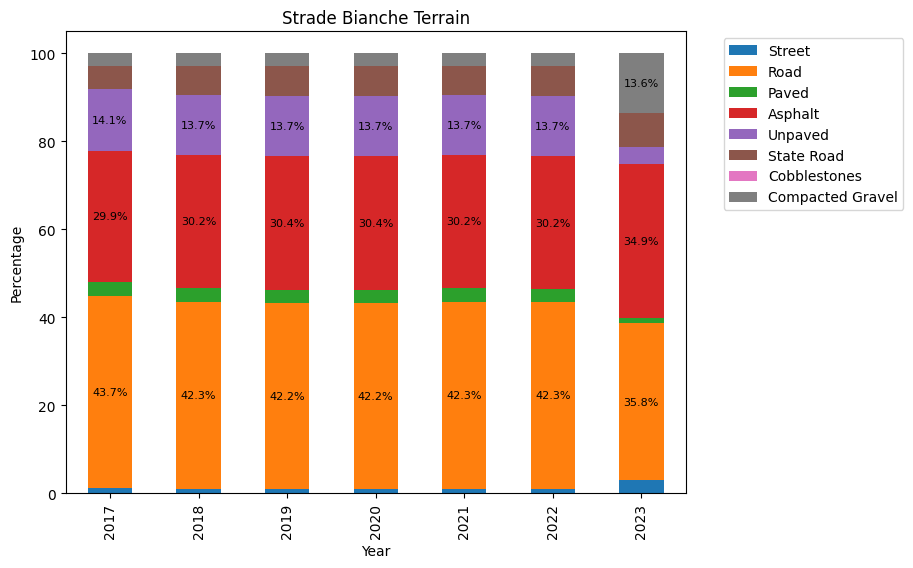

In [37]:
df = strade.set_index('Year')[strade_cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('Strade Bianche Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

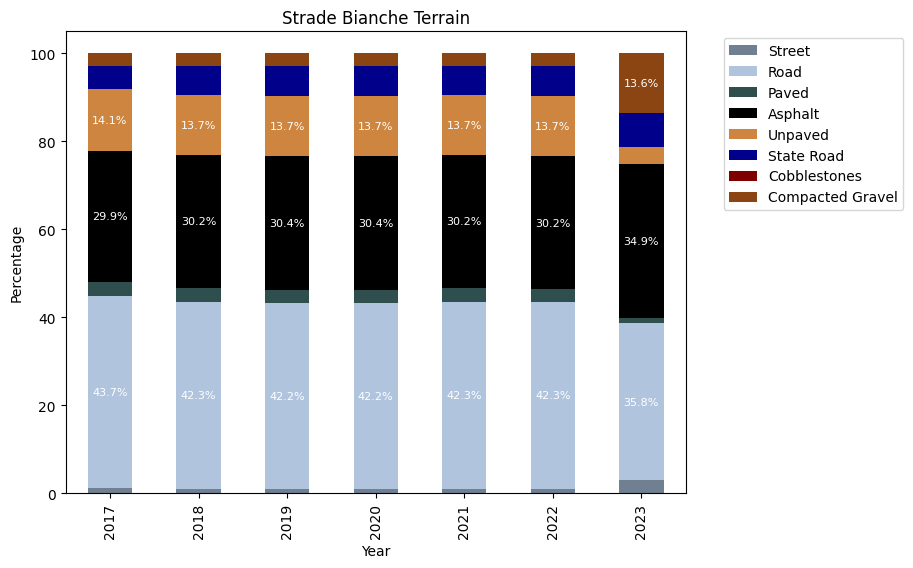

In [39]:
df = strade.set_index('Year')[strade_cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6), color=strade_colors)
plt.ylabel('Percentage')
plt.title('Strade Bianche Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='white', fontsize=8)
        cumulative += perc

plt.show()

In [41]:
roubaix = terrain[terrain['Race Name'] == 'Paris-Roubaix']
roubaix

,Unnamed: 0.1,Unnamed: 0,PCS race entry,Race Name,Race Tags,Year,Distance,Street,Road,Paved,...,Compacted Gravel,Off-grid (unknown),Singletrack,Access Road,Alpine,Net Gain,Lowest Elevation,Highest Elevation,Vertical Gain,Downhill
73,57,88,2017 paris-roubaix,Paris-Roubaix,"Monument, Spring, Cobbled",2017,258,0,0,0,...,0,0,0,0,0,-20,15,161,1179,1200
74,58,89,2018 paris-roubaix,Paris-Roubaix,"Monument, Spring, Cobbled",2018,256,6,178,12,...,0,1,1,0,0,-20,15,161,1200,1220
75,59,90,2019 paris-roubaix,Paris-Roubaix,"Monument, Spring, Cobbled",2019,254,12,172,16,...,0,2,1,0,0,-40,16,161,1200,1240
76,60,91,2021 paris-roubaix,Paris-Roubaix,"Monument, Spring, Cobbled",2021,257,0,0,0,...,0,0,0,0,0,-40,15,161,1179,1220
77,61,92,2022 paris-roubaix,Paris-Roubaix,"Monument, Spring, Cobbled",2022,257,0,0,0,...,0,0,0,0,0,-30,15,161,1190,1220
78,62,93,2023 paris-roubaix,Paris-Roubaix,"Monument, Spring, Cobbled",2023,257,14,173,17,...,0,1,0,0,0,-40,15,161,1210,1250


In [43]:
# Although asphalt is a material commonly used to surface roads, meaning most roads are made of asphalt, but not all roads are simply "asphalt" 
# as a road can be made from other materials like concrete as well; essentially, "road" refers to the entire paved pathway for vehicles, 
# while "asphalt" is just the material used to pave it. 


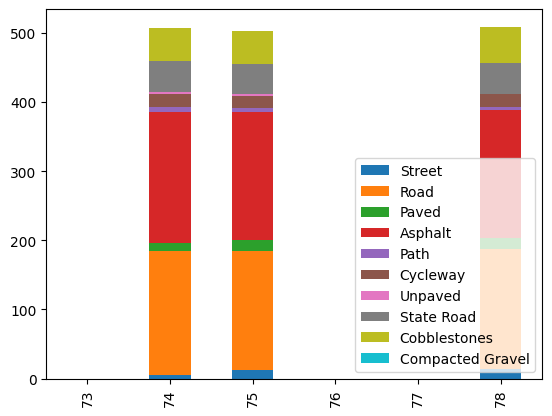

In [45]:
roubaix[['Street', 'Road', 'Paved', 'Asphalt', 'Path', 'Cycleway', 'Unpaved', 'State Road', 'Cobblestones', 'Compacted Gravel']].plot(kind='bar', stacked=True)
plt.show()

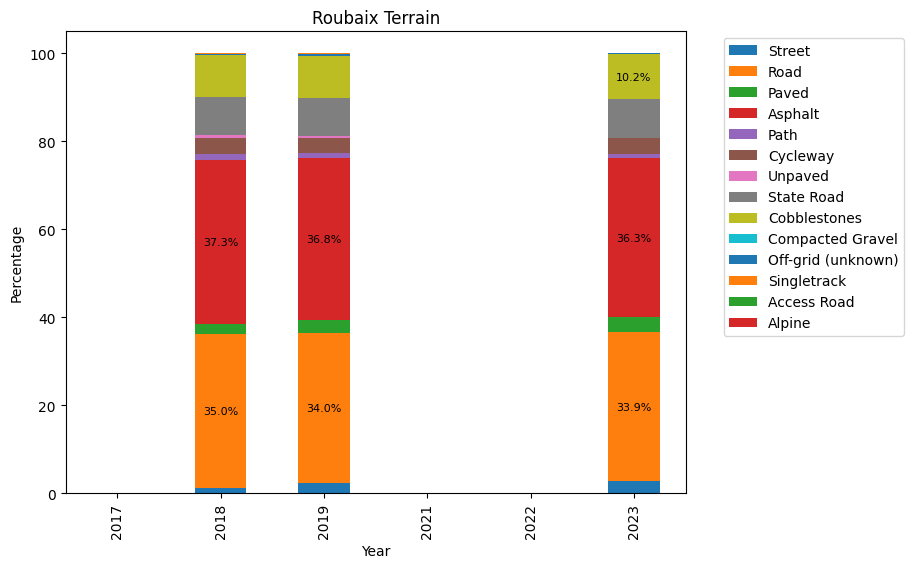

In [47]:
df = roubaix.set_index('Year')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('Roubaix Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

In [49]:
amstel = terrain[terrain['Race Name'] == 'Amstel Gold Race']
amstel

,Unnamed: 0.1,Unnamed: 0,PCS race entry,Race Name,Race Tags,Year,Distance,Street,Road,Paved,...,Compacted Gravel,Off-grid (unknown),Singletrack,Access Road,Alpine,Net Gain,Lowest Elevation,Highest Elevation,Vertical Gain,Downhill
0,0,94,2017 amstel gold race,Amstel Gold Race,"Spring, Adrennes",2017,261,0,0,0,...,0,0,0,0,0,90,41,326,3240,3150
1,1,95,2018 amstel gold race,Amstel Gold Race,"Spring, Adrennes",2018,261,0,0,0,...,0,0,0,0,0,80,42,324,3240,3160
2,2,96,2019 amstel gold race,Amstel Gold Race,"Spring, Adrennes",2019,266,0,0,0,...,0,0,0,0,0,80,42,328,3270,3190
3,3,97,2021 amstel gold race,Amstel Gold Race,"Spring, Adrennes",2021,216,0,0,0,...,0,0,0,0,0,30,55,156,2450,2420
4,4,98,2022 amstel gold race,Amstel Gold Race,"Spring, Adrennes",2022,249,0,0,0,...,0,0,0,0,0,80,42,326,3130,3050
5,5,99,2023 amstel gold race,Amstel Gold Race,"Spring, Adrennes",2023,251,5,148,12,...,0,3,0,0,0,79,42,326,3050,2970


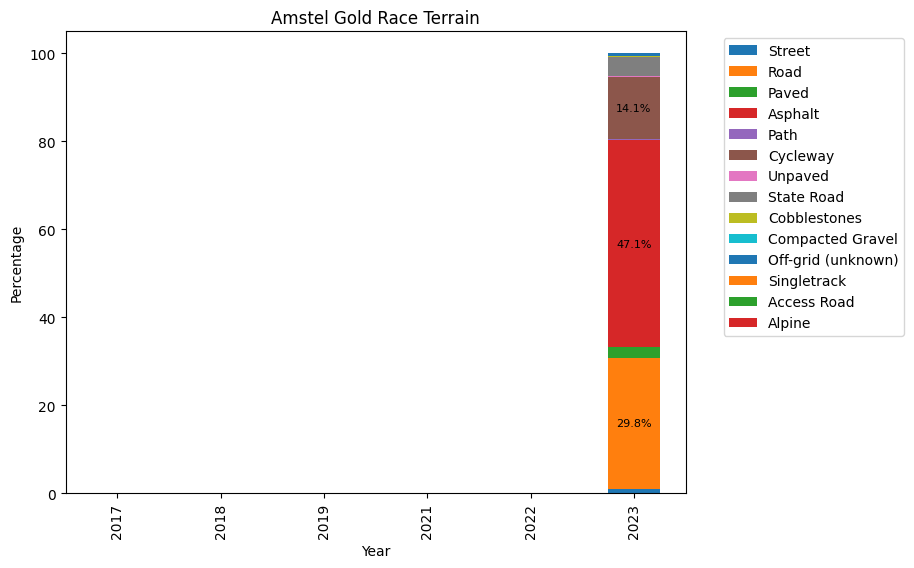

In [51]:
df = amstel.set_index('Year')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('Amstel Gold Race Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

In [53]:
pijl = terrain[terrain['Race Name'] == 'De Brabantse Pijl ']
pijl

,Unnamed: 0.1,Unnamed: 0,PCS race entry,Race Name,Race Tags,Year,Distance,Street,Road,Paved,...,Compacted Gravel,Off-grid (unknown),Singletrack,Access Road,Alpine,Net Gain,Lowest Elevation,Highest Elevation,Vertical Gain,Downhill
6,6,61,2017 de brabantse pijl - la fleche brabanconne,De Brabantse Pijl,Flanders,2017,204,26,70,67,...,0,0,0,0,0,60,23,149,1960,1900
7,7,60,2018 de brabantse pijl - la fleche brabanconne,De Brabantse Pijl,Flanders,2018,201,22,77,58,...,0,0,0,0,0,60,27,149,1990,1930
8,8,59,2019 de brabantse pijl - la fleche brabanconne,De Brabantse Pijl,Flanders,2019,199,30,88,68,...,0,0,0,0,0,59,23,124,2050,1990
9,9,58,2020 de brabantse pijl - la fleche brabanconne,De Brabantse Pijl,Flanders,2020,196,19,84,62,...,0,0,0,0,0,60,28,148,1870,1810
10,10,57,2021 de brabantse pijl - la fleche brabanconne,De Brabantse Pijl,Flanders,2021,201,20,84,61,...,0,0,0,0,0,70,24,148,1990,1920
11,11,56,2022 de brabantse pijl - la fleche brabanconne,De Brabantse Pijl,Flanders,2022,204,18,91,56,...,0,0,0,0,0,70,24,146,1890,1820
12,12,55,2023 de brabantse pijl - la fleche brabanconne,De Brabantse Pijl,Flanders,2023,205,19,91,59,...,0,0,0,0,0,70,24,146,1910,1840


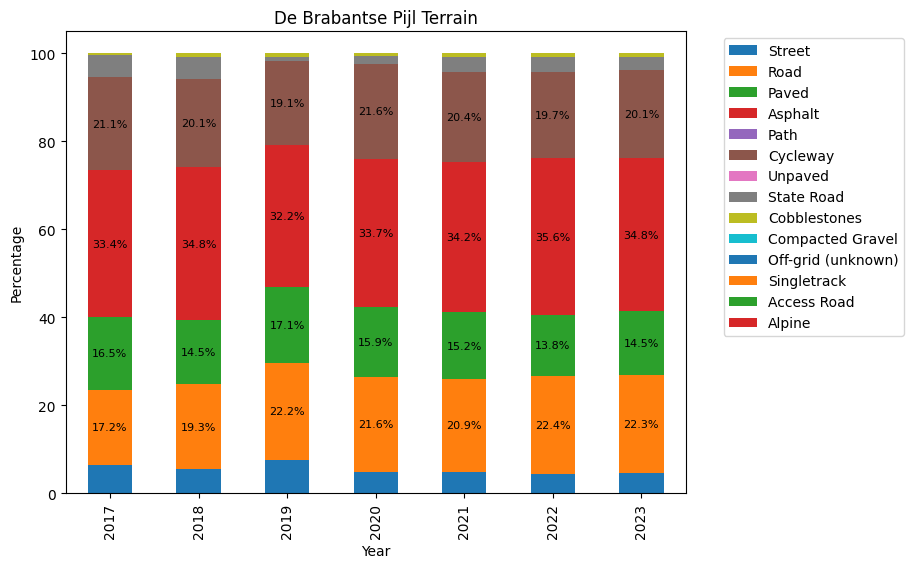

In [55]:
df = pijl.set_index('Year')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('De Brabantse Pijl Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

In [57]:
dwars = terrain[terrain['Race Name'] == 'Dwars door Vlaanderen']
dwars

,Unnamed: 0.1,Unnamed: 0,PCS race entry,Race Name,Race Tags,Year,Distance,Street,Road,Paved,...,Compacted Gravel,Off-grid (unknown),Singletrack,Access Road,Alpine,Net Gain,Lowest Elevation,Highest Elevation,Vertical Gain,Downhill
13,18,76,2017 dwars door vlaanderen / a travers la flandre,Dwars door Vlaanderen,"Spring, Cobbled, Flanders",2017,205,0,0,0,...,0,0,0,0,0,-20,6,165,1470,1490
14,13,77,2018 dwars door vlaanderen - a travers la flan...,Dwars door Vlaanderen,"Spring, Cobbled, Flanders",2018,180,0,0,0,...,0,0,0,0,0,-10,6,166,1340,1350
15,14,78,2019 dwars door vlaanderen - a travers la flandre,Dwars door Vlaanderen,"Spring, Cobbled, Flanders",2019,182,0,0,0,...,0,0,0,0,0,-10,8,165,1280,1290
16,15,79,2021 dwars door vlaanderen - a travers la flandre,Dwars door Vlaanderen,"Spring, Cobbled, Flanders",2021,182,22,77,55,...,1,2,1,0,0,-10,7,163,1419,1429
17,16,80,2022 dwars door vlaanderen - a travers la flandre,Dwars door Vlaanderen,"Spring, Cobbled, Flanders",2022,183,0,0,0,...,0,0,0,0,0,-10,8,163,1580,1590
18,17,75,2023 dwars door vlaanderen - a travers la flandre,Dwars door Vlaanderen,"Spring, Cobbled, Flanders",2023,182,19,82,60,...,1,1,1,0,0,-10,8,165,1440,1450


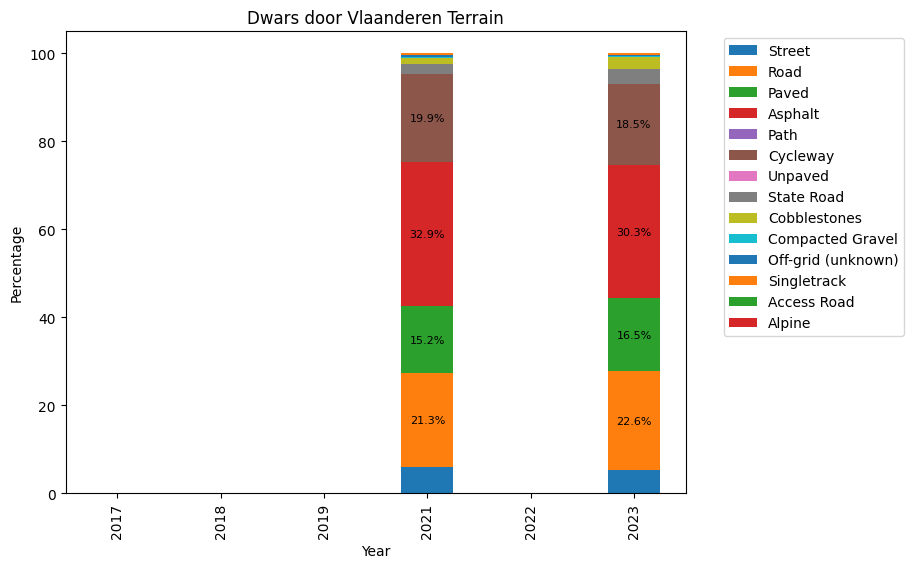

In [59]:
df = dwars.set_index('Year')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('Dwars door Vlaanderen Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

In [61]:
saxo = terrain[terrain['Race Name'] == 'E3 Saxo Classic']
saxo

,Unnamed: 0.1,Unnamed: 0,PCS race entry,Race Name,Race Tags,Year,Distance,Street,Road,Paved,...,Compacted Gravel,Off-grid (unknown),Singletrack,Access Road,Alpine,Net Gain,Lowest Elevation,Highest Elevation,Vertical Gain,Downhill
19,63,23,2017 record bank e3 harelbeke,E3 Saxo Classic,"Spring, Cobbled",2017,204,0,0,0,...,0,0,0,0,0,0,9,164,1850,1850
20,64,24,2018 record bank e3 harelbeke,E3 Saxo Classic,"Spring, Cobbled",2018,206,0,0,0,...,0,0,0,0,0,0,11,151,1900,1900
21,19,25,2019 e3 binckbank classic,E3 Saxo Classic,"Spring, Cobbled",2019,204,0,0,0,...,0,0,0,0,0,0,9,162,1940,1940
22,20,21,2021 e3 saxo bank classic,E3 Saxo Classic,"Spring, Cobbled",2021,204,0,0,0,...,0,0,0,0,0,0,9,159,1970,1970
23,21,22,2022 e3 saxo bank classic,E3 Saxo Classic,"Spring, Cobbled",2022,205,0,0,0,...,0,0,0,0,0,0,9,155,1950,1950
24,22,26,2023 e3 saxo classic,E3 Saxo Classic,"Spring, Cobbled",2023,201,31,86,74,...,1,0,1,0,0,0,8,155,1970,1970


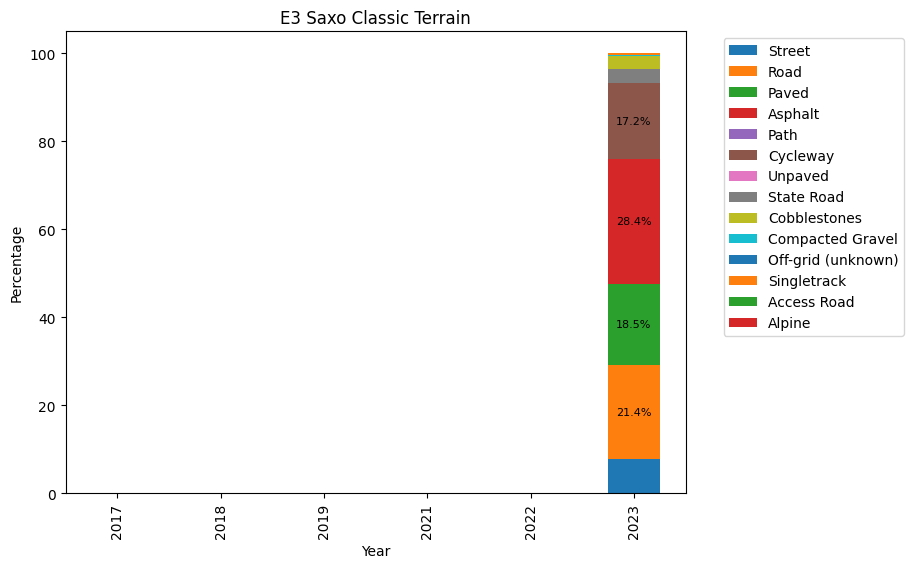

In [63]:
df = saxo.set_index('Year')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('E3 Saxo Classic Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

In [65]:
gent = terrain[terrain['Race Name'] == 'Gent-Wevelgem']
gent

,Unnamed: 0.1,Unnamed: 0,PCS race entry,Race Name,Race Tags,Year,Distance,Street,Road,Paved,...,Compacted Gravel,Off-grid (unknown),Singletrack,Access Road,Alpine,Net Gain,Lowest Elevation,Highest Elevation,Vertical Gain,Downhill
25,25,27,2017 gent-wevelgem in flanders fields,Gent-Wevelgem,"Spring, Cobbled",2017,248,0,0,0,...,0,0,0,0,0,20,-4,160,1540,1520
26,26,28,2018 gent-wevelgem in flanders fields,Gent-Wevelgem,"Spring, Cobbled",2018,250,0,0,0,...,0,0,0,0,0,10,-3,161,1520,1510
27,27,29,2019 gent-wevelgem in flanders fields,Gent-Wevelgem,"Spring, Cobbled",2019,251,0,0,0,...,0,0,0,0,0,20,-2,162,1510,1490
28,23,30,2020 gent-wevelgem in flanders fields,Gent-Wevelgem,"Spring, Cobbled",2020,232,0,0,0,...,0,0,0,0,0,-40,-3,155,1280,1320
29,28,31,2021 gent-wevelgem in flanders fields,Gent-Wevelgem,"Spring, Cobbled",2021,251,0,0,0,...,0,0,0,0,0,0,-3,154,1370,1370
30,29,32,2022 gent-wevelgem in flanders fields,Gent-Wevelgem,"Spring, Cobbled",2022,249,0,0,0,...,0,0,0,0,0,-40,-3,154,1290,1330
31,24,33,2023 gent-wevelgem in flanders fields,Gent-Wevelgem,"Spring, Cobbled",2023,260,6,126,74,...,3,0,0,0,0,-50,-3,155,1300,1350


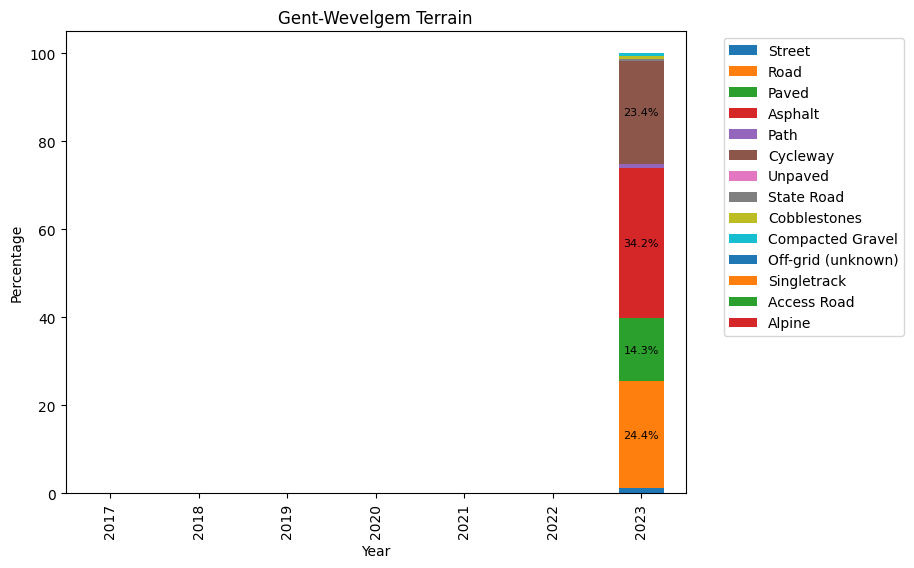

In [67]:
df = gent.set_index('Year')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('Gent-Wevelgem Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

In [69]:
fleche = terrain[terrain['Race Name'] == 'La Flèche Wallonne']
fleche

,Unnamed: 0.1,Unnamed: 0,PCS race entry,Race Name,Race Tags,Year,Distance,Street,Road,Paved,...,Compacted Gravel,Off-grid (unknown),Singletrack,Access Road,Alpine,Net Gain,Lowest Elevation,Highest Elevation,Vertical Gain,Downhill
46,30,35,2017 la flèche wallonne,La Flèche Wallonne,"Spring, Adrennes",2017,203,18,128,23,...,0,0,0,0,0,10,67,305,2630,2620
47,31,36,2018 la flèche wallonne,La Flèche Wallonne,"Spring, Adrennes",2018,197,11,131,7,...,0,0,0,0,0,19,67,531,3340,3320
48,32,37,2019 la flèche wallonne,La Flèche Wallonne,"Spring, Adrennes",2019,194,0,0,0,...,0,0,0,0,0,80,52,329,2920,2840
49,33,38,2020 la flèche wallonne,La Flèche Wallonne,"Spring, Adrennes",2020,199,15,142,9,...,0,0,0,0,0,-110,70,445,2990,3100
50,34,39,2021 la flèche wallonne,La Flèche Wallonne,"Spring, Adrennes",2021,192,11,152,24,...,0,0,0,0,0,70,70,302,2790,2720
51,35,40,2022 la flèche wallonne,La Flèche Wallonne,"Spring, Adrennes",2022,202,7,157,7,...,0,0,0,0,0,30,70,328,3070,3040
52,36,34,2023 la flèche wallonne,La Flèche Wallonne,"Spring, Adrennes",2023,193,8,152,7,...,0,0,0,0,0,-110,69,313,3030,3140


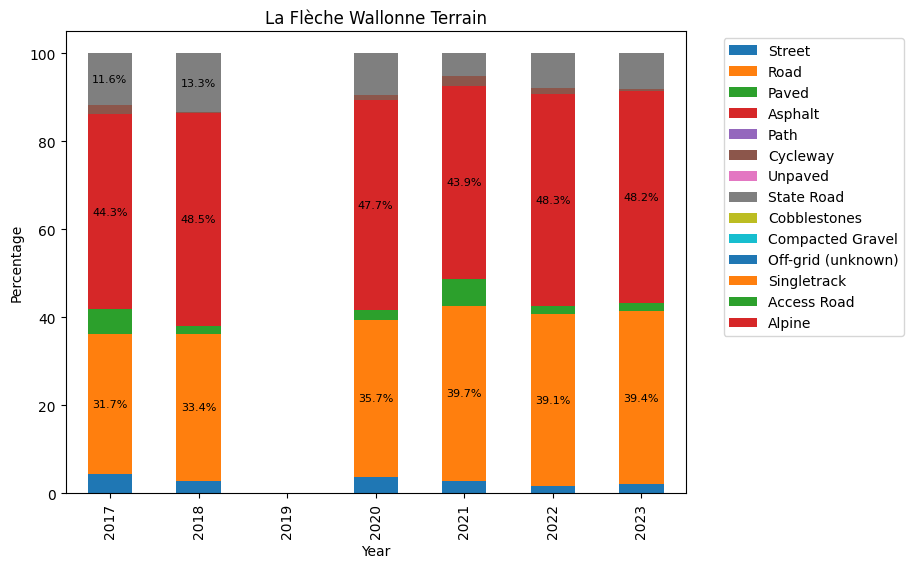

In [71]:
df = fleche.set_index('Year')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('La Flèche Wallonne Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

In [73]:
liege = terrain[terrain['Race Name'] == 'Liege - Bastogne - Liege']
liege

,Unnamed: 0.1,Unnamed: 0,PCS race entry,Race Name,Race Tags,Year,Distance,Street,Road,Paved,...,Compacted Gravel,Off-grid (unknown),Singletrack,Access Road,Alpine,Net Gain,Lowest Elevation,Highest Elevation,Vertical Gain,Downhill
53,37,69,2017 liege - bastogne - liege,Liege - Bastogne - Liege,"Monument, Spring, Ardennes",2017,264,10,175,10,...,0,0,0,0,0,90,62,563,4180,4090
54,38,70,2018 liege - bastogne - liege,Liege - Bastogne - Liege,"Monument, Spring, Ardennes",2018,171,12,102,6,...,0,1,0,0,0,-360,61,573,2440,2800
55,39,71,2019 liege - bastogne - liege,Liege - Bastogne - Liege,"Monument, Spring, Ardennes",2019,171,7,106,8,...,0,0,0,0,0,-340,94,573,2450,2790
56,40,72,2021 liege - bastogne - liege,Liege - Bastogne - Liege,"Monument, Spring, Ardennes",2021,258,8,174,13,...,0,0,0,0,0,-40,63,568,4110,4150
57,41,73,2022 liege - bastogne - liege,Liege - Bastogne - Liege,"Monument, Spring, Ardennes",2022,257,7,174,12,...,0,0,0,0,0,-40,63,568,4120,4160
58,42,74,2023 liege - bastogne - liege,Liege - Bastogne - Liege,"Monument, Spring, Ardennes",2023,173,6,140,8,...,0,0,0,0,0,-350,107,569,2630,2980


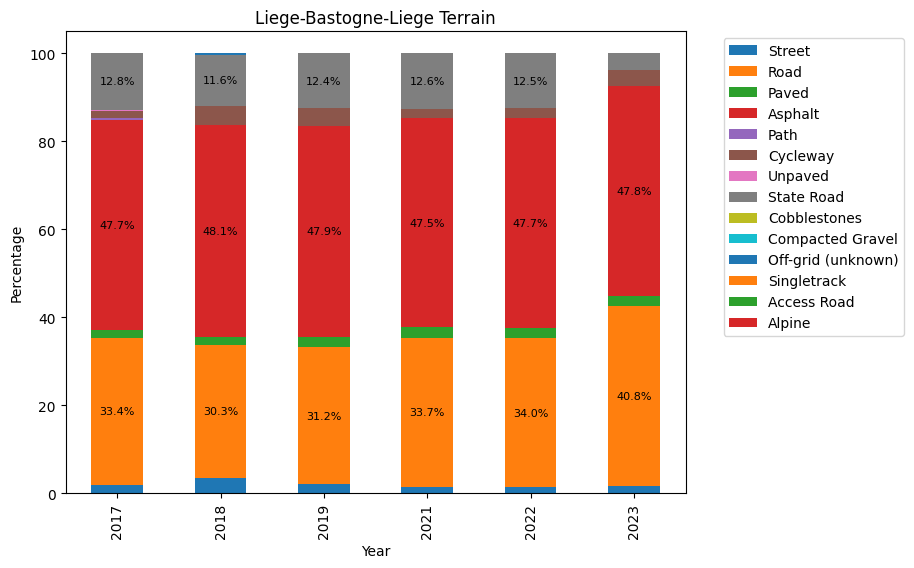

In [75]:
df = liege.set_index('Year')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('Liege-Bastogne-Liege Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

In [77]:
remo = terrain[terrain['Race Name'] == 'Milano-Sanremo']
remo

,Unnamed: 0.1,Unnamed: 0,PCS race entry,Race Name,Race Tags,Year,Distance,Street,Road,Paved,...,Compacted Gravel,Off-grid (unknown),Singletrack,Access Road,Alpine,Net Gain,Lowest Elevation,Highest Elevation,Vertical Gain,Downhill
59,43,82,2017 milano-sanremo,Milano-Sanremo,Monument,2017,291,0,0,0,...,0,0,0,0,0,-100,3,563,2170,2270
60,44,81,2018 milano-sanremo,Milano-Sanremo,Monument,2018,293,0,0,0,...,0,0,0,0,0,-90,3,551,2110,2200
61,45,83,2019 milano-sanremo,Milano-Sanremo,Monument,2019,291,0,0,0,...,0,0,0,0,0,-100,3,546,2110,2210
62,46,84,2020 milano-sanremo,Milano-Sanremo,Monument,2020,30,1,153,4,...,0,15,0,0,0,-100,5,936,3340,3440
63,47,85,2021 milano-sanremo,Milano-Sanremo,Monument,2021,299,0,0,0,...,0,0,0,0,0,-90,3,520,2020,2110
64,48,86,2022 milano-sanremo,Milano-Sanremo,Monument,2022,293,0,0,0,...,0,0,0,0,0,-90,3,546,2130,2220
65,49,87,2023 milano-sanremo,Milano-Sanremo,Monument,2023,293,1,59,5,...,0,0,0,0,0,-100,2,548,2200,2300


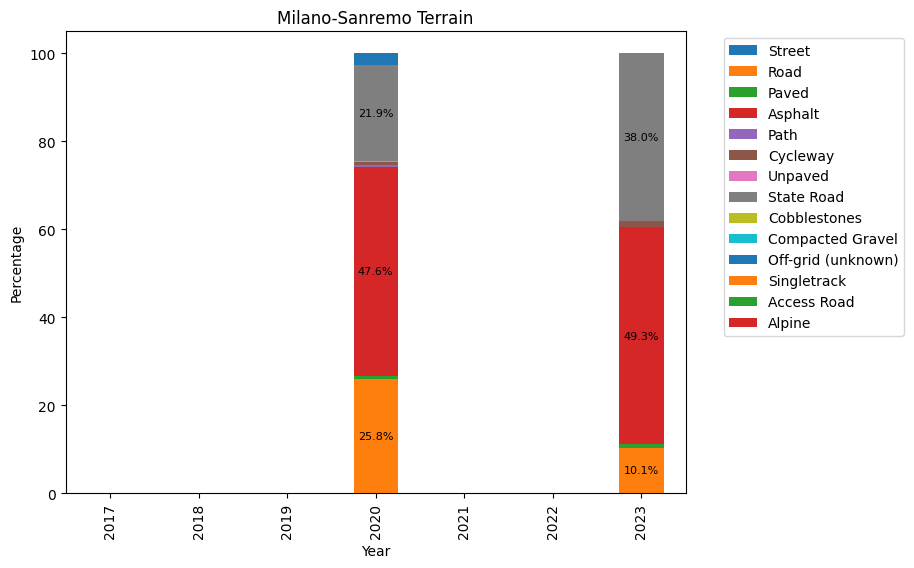

In [79]:
df = remo.set_index('Year')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('Milano-Sanremo Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

In [81]:
omloop = terrain[terrain['Race Name'] == 'Omloop Het Nieuwsblad']
omloop

,Unnamed: 0.1,Unnamed: 0,PCS race entry,Race Name,Race Tags,Year,Distance,Street,Road,Paved,...,Compacted Gravel,Off-grid (unknown),Singletrack,Access Road,Alpine,Net Gain,Lowest Elevation,Highest Elevation,Vertical Gain,Downhill
66,50,42,2017 omloop het nieuwsblad,Omloop Het Nieuwsblad,"Cobbled, Flanders",2017,198,0,0,0,...,0,0,0,0,0,0,4,142,1620,1620
67,51,43,2018 omloop het nieuwsblad,Omloop Het Nieuwsblad,"Cobbled, Flanders",2018,197,0,0,0,...,0,0,0,0,0,20,8,107,1570,1550
68,52,44,2019 omloop het nieuwsblad,Omloop Het Nieuwsblad,"Cobbled, Flanders",2019,203,0,0,0,...,0,0,0,0,0,-10,7,107,1550,1560
69,53,45,2020 omloop het nieuwsblad,Omloop Het Nieuwsblad,"Cobbled, Flanders",2020,200,0,0,0,...,0,0,0,0,0,0,6,105,1530,1530
70,54,46,2021 omloop het nieuwsblad,Omloop Het Nieuwsblad,"Cobbled, Flanders",2021,200,0,0,0,...,0,0,0,0,0,0,6,106,1580,1580
71,55,47,2022 omloop het nieuwsblad,Omloop Het Nieuwsblad,"Cobbled, Flanders",2022,204,0,0,0,...,0,0,0,0,0,0,7,107,1560,1560
72,56,41,2023 omloop het nieuwsblad,Omloop Het Nieuwsblad,"Cobbled, Flanders",2023,207,46,72,89,...,0,0,0,0,0,0,6,106,1550,1550


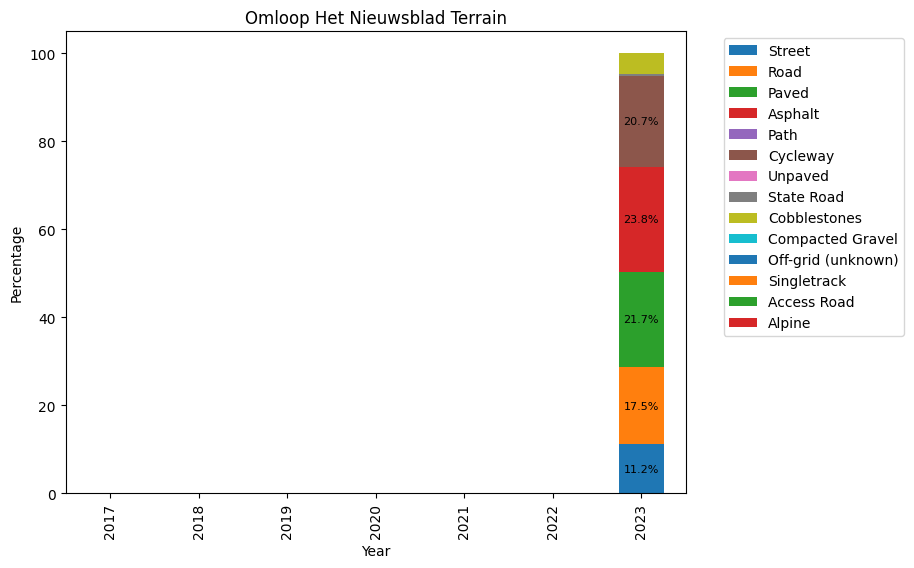

In [83]:
df = omloop.set_index('Year')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('Omloop Het Nieuwsblad Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

In [85]:
ronde = terrain[terrain['Race Name'] == 'Ronde van Vlaanderen']
ronde

,Unnamed: 0.1,Unnamed: 0,PCS race entry,Race Name,Race Tags,Year,Distance,Street,Road,Paved,...,Compacted Gravel,Off-grid (unknown),Singletrack,Access Road,Alpine,Net Gain,Lowest Elevation,Highest Elevation,Vertical Gain,Downhill
79,71,10,2017 ronde van vlaanderen / tour des flandres,Ronde van Vlaanderen,"Monument, Spring, Cobbled, Flanders",2017,260,0,0,0,...,0,0,0,0,0,0,0,165,2130,2130
80,65,11,2018 ronde van vlaanderen - tour des flandres,Ronde van Vlaanderen,"Monument, Spring, Cobbled, Flanders",2018,266,0,0,0,...,0,0,0,0,0,10,0,165,2180,2170
81,66,12,2019 ronde van vlaanderen - tour des flandres,Ronde van Vlaanderen,"Monument, Spring, Cobbled, Flanders",2019,270,0,0,0,...,0,0,0,0,0,0,0,165,2200,2200
82,67,7,2020 ronde van vlaanderen - tour des flandres,Ronde van Vlaanderen,"Monument, Spring, Cobbled, Flanders",2020,244,0,0,0,...,0,0,0,0,0,0,0,165,1990,1990
83,68,13,2021 ronde van vlaanderen - tour des flandres,Ronde van Vlaanderen,"Monument, Spring, Cobbled, Flanders",2021,254,0,0,0,...,0,0,0,0,0,0,0,165,2170,2170
84,69,8,2022 ronde van vlaanderen - tour des flandres,Ronde van Vlaanderen,"Monument, Spring, Cobbled, Flanders",2022,272,0,0,0,...,0,0,0,0,0,0,0,164,2230,2230
85,70,9,2023 ronde van vlaanderen - tour des flandres,Ronde van Vlaanderen,"Monument, Spring, Cobbled, Flanders",2023,273,37,97,103,...,0,4,0,0,0,10,6,164,2200,2190


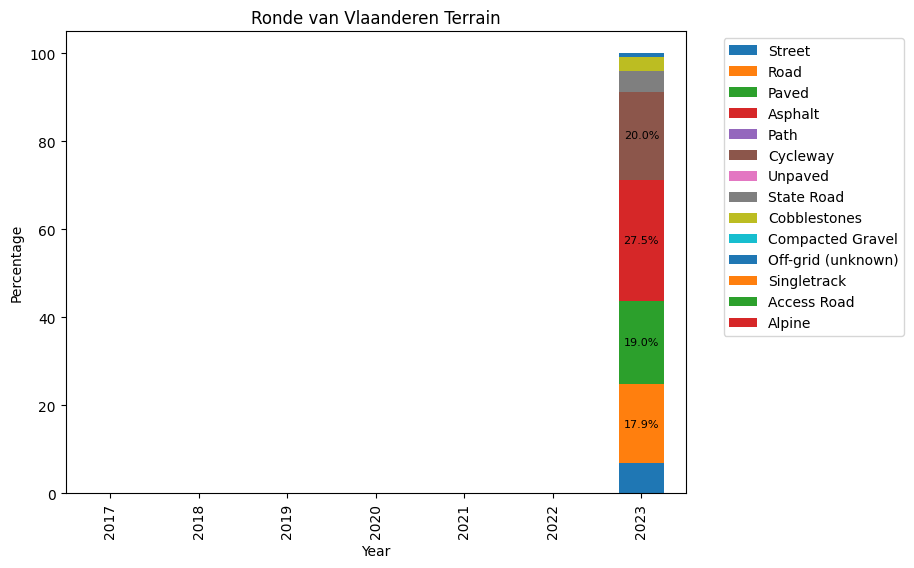

In [87]:
df = ronde.set_index('Year')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('Ronde van Vlaanderen Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

In [89]:
prijs = terrain[terrain['Race Name'] == 'Scheldeprijs']
prijs

,Unnamed: 0.1,Unnamed: 0,PCS race entry,Race Name,Race Tags,Year,Distance,Street,Road,Paved,...,Compacted Gravel,Off-grid (unknown),Singletrack,Access Road,Alpine,Net Gain,Lowest Elevation,Highest Elevation,Vertical Gain,Downhill
86,72,49,2017 scheldeprijs,Scheldeprijs,Flanders,2017,200,0,0,0,...,0,0,0,0,0,-30,3,49,480,510
87,73,50,2018 scheldeprijs,Scheldeprijs,Flanders,2018,201,0,0,0,...,0,0,0,0,0,10,-2,22,340,330
88,74,51,2019 scheldeprijs,Scheldeprijs,Flanders,2019,204,0,0,0,...,0,0,0,0,0,10,-2,22,300,290
89,75,52,2020 scheldeprijs,Scheldeprijs,Flanders,2020,177,0,0,0,...,0,0,0,0,0,0,1,15,370,370
90,76,53,2021 scheldeprijs,Scheldeprijs,Flanders,2021,194,0,0,0,...,0,0,0,0,0,10,-2,33,360,350
91,77,54,2022 scheldeprijs,Scheldeprijs,Flanders,2022,199,0,0,0,...,0,0,0,0,0,10,-4,34,380,370
92,78,48,2023 scheldeprijs,Scheldeprijs,Flanders,2023,205,4,73,77,...,0,16,0,0,0,10,-5,33,400,390


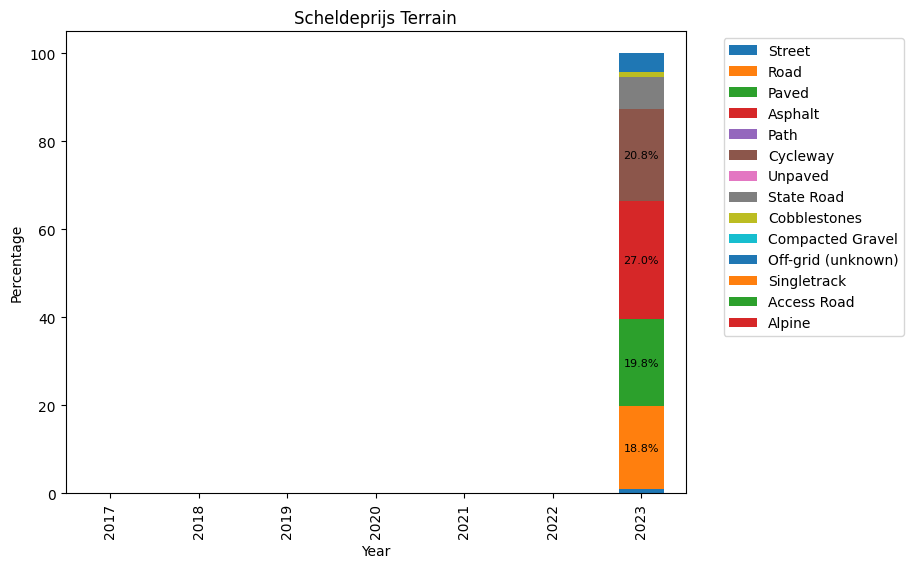

In [91]:
df = prijs.set_index('Year')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('Scheldeprijs Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

In [93]:
il = terrain[terrain['Race Name'] == 'Il Lombardia']
il

,Unnamed: 0.1,Unnamed: 0,PCS race entry,Race Name,Race Tags,Year,Distance,Street,Road,Paved,...,Compacted Gravel,Off-grid (unknown),Singletrack,Access Road,Alpine,Net Gain,Lowest Elevation,Highest Elevation,Vertical Gain,Downhill
32,86,3,2017 Il Lombardia,Il Lombardia,Monument,2017,247,0,0,0,...,0,0,0,0,0,-30,155,1114,3920,3950
33,87,3,2018 Il Lombardia,Il Lombardia,Monument,2018,240,0,0,0,...,0,0,0,0,0,-30,160,1114,3810,3840
34,88,3,2019 Il Lombardia,Il Lombardia,Monument,2019,243,0,0,0,...,0,0,0,0,0,-30,160,1119,3900,3930
35,89,3,2020 Il Lombardia,Il Lombardia,Monument,2020,231,0,0,0,...,0,0,0,0,0,-30,160,1119,3760,3790
36,90,3,2021 Il Lombardia,Il Lombardia,Monument,2021,239,0,0,0,...,0,0,0,0,0,-40,200,1261,4940,4980
37,91,3,2022 Il Lombardia,Il Lombardia,Monument,2022,253,1,214,2,...,0,2,0,0,0,-60,199,1070,5230,5290
38,92,3,2023 Il Lombardia,Il Lombardia,Monument,2023,238,1,204,1,...,0,5,0,0,0,-40,200,1261,5070,5110


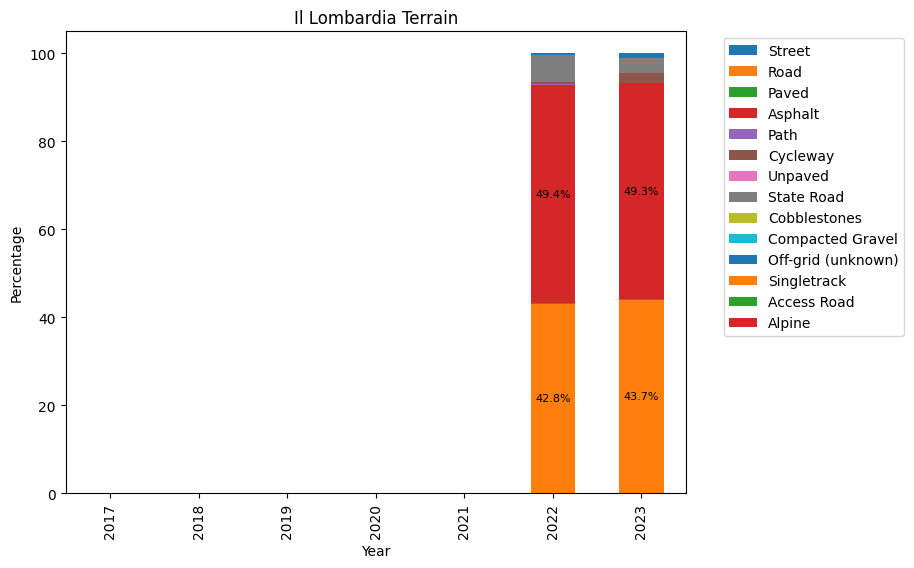

In [95]:
df = il.set_index('Year')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('Il Lombardia Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

In [97]:
kurne = terrain[terrain['Race Name'] == 'Kuurne-Brussel-Kuurne']
kurne

,Unnamed: 0.1,Unnamed: 0,PCS race entry,Race Name,Race Tags,Year,Distance,Street,Road,Paved,...,Compacted Gravel,Off-grid (unknown),Singletrack,Access Road,Alpine,Net Gain,Lowest Elevation,Highest Elevation,Vertical Gain,Downhill
39,93,3,2017 Kuurne-Bruxelles-Kuurne,Kuurne-Brussel-Kuurne,"Spring, Cobbled",2017,202,0,0,0,...,0,0,0,0,0,0,9,165,1460,1460
40,94,3,2018 Kuurne-Bruxelles-Kuurne,Kuurne-Brussel-Kuurne,"Spring, Cobbled",2018,202,0,0,0,...,0,0,0,0,0,0,9,165,1470,1470
41,95,3,2019 Kuurne-Bruxelles-Kuurne,Kuurne-Brussel-Kuurne,"Spring, Cobbled",2019,201,21,72,63,...,0,0,0,0,0,0,7,162,1470,1470
42,96,3,2020 Kuurne-Bruxelles-Kuurne,Kuurne-Brussel-Kuurne,"Spring, Cobbled",2020,202,0,0,0,...,0,0,0,0,0,9,9,167,1690,1679
43,97,3,2021 Kuurne - Bruxelles - Kuurne,Kuurne-Brussel-Kuurne,"Spring, Cobbled",2021,197,0,0,0,...,0,0,0,0,0,9,8,164,1690,1679
44,98,3,2022 Kuurne - Bruxelles - Kuurne,Kuurne-Brussel-Kuurne,"Spring, Cobbled",2022,195,0,0,0,...,0,0,0,0,0,0,8,162,1770,1770
45,99,3,2023 Kuurne - Bruxelles - Kuurne,Kuurne-Brussel-Kuurne,"Spring, Cobbled",2023,191,18,96,72,...,0,0,0,0,0,0,8,162,1740,1740


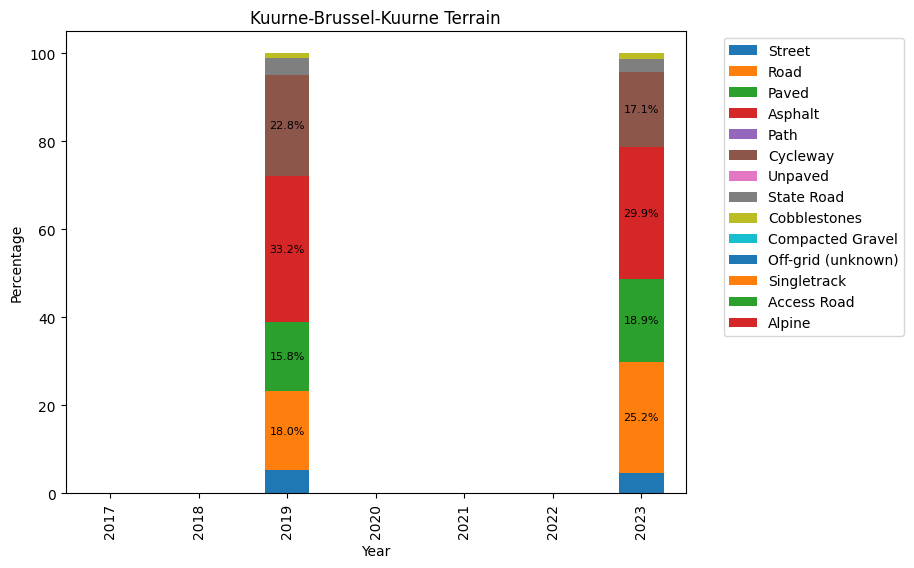

In [99]:
df = kurne.set_index('Year')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('Kuurne-Brussel-Kuurne Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

In [101]:
monuments = ['Il Lombardia', 'Liege - Bastogne - Liege', 'Milano-Sanremo', 'Paris-Roubaix', 'Ronde van Vlaanderen']

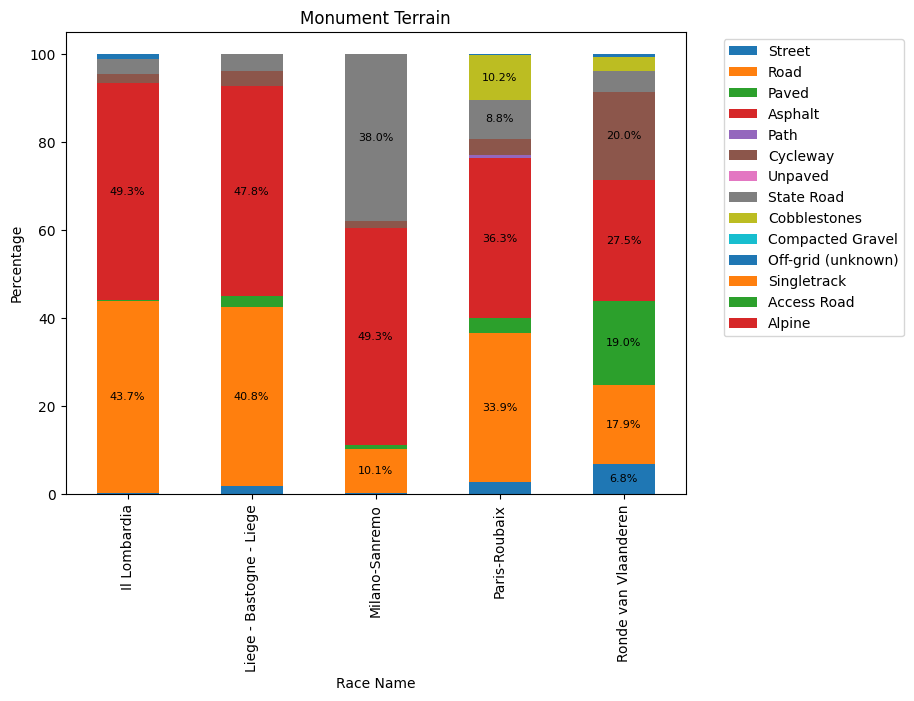

In [103]:
terrain2023 = terrain[terrain['Year'] == 2023]

df = terrain2023[terrain2023['Race Name'].isin(monuments)].set_index('Race Name')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('Monument Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 5:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

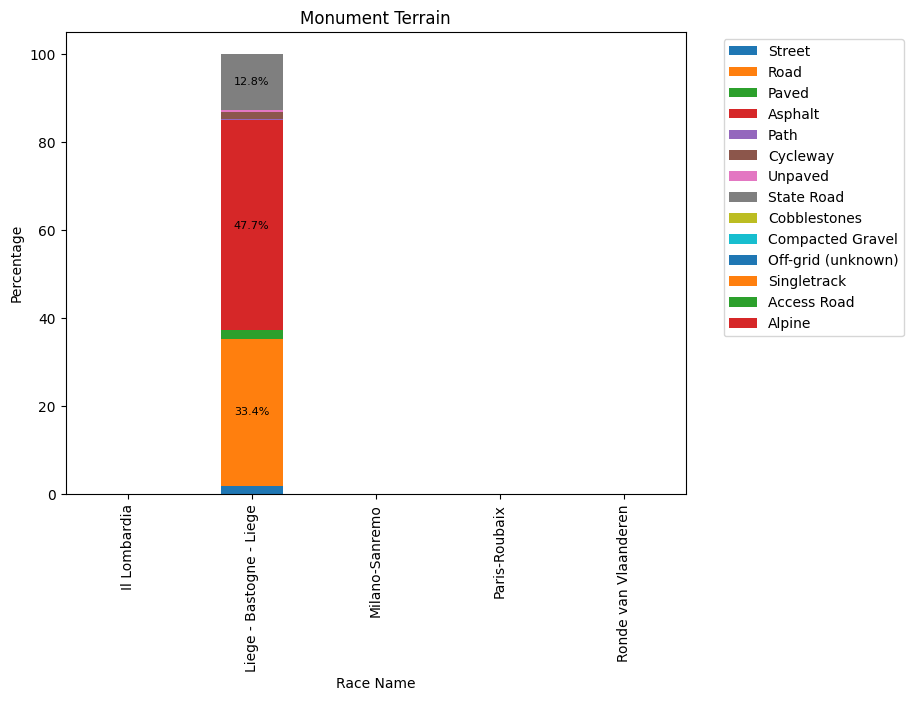

In [104]:
terrain2017 = terrain[terrain['Year'] == 2017]

df = terrain2017[terrain2017['Race Name'].isin(monuments)].set_index('Race Name')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('Monument Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

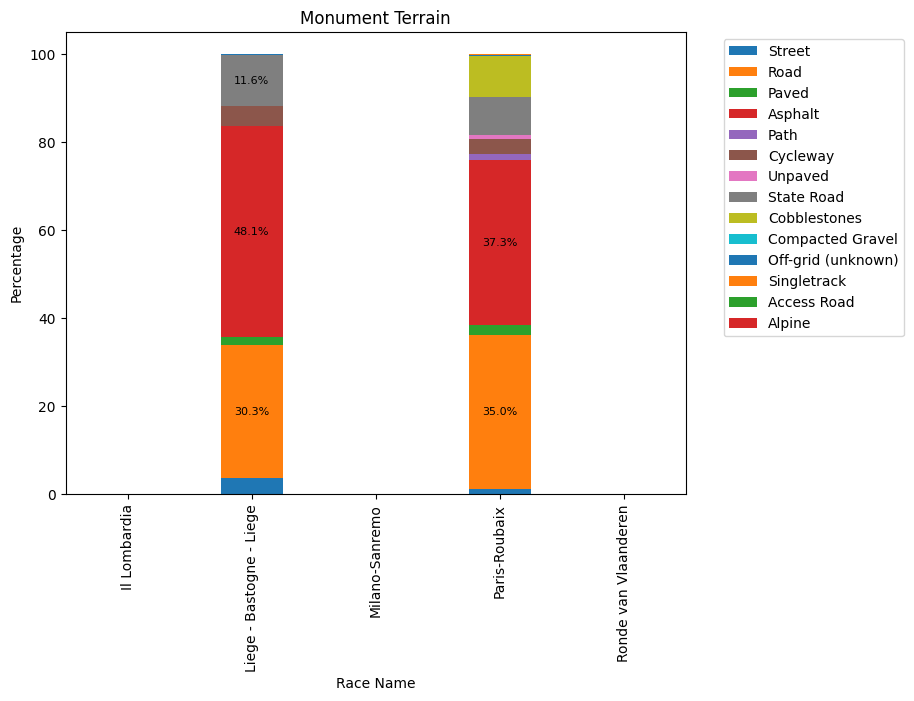

In [107]:
terrain2018 = terrain[terrain['Year'] == 2018]

df = terrain2018[terrain2018['Race Name'].isin(monuments)].set_index('Race Name')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('Monument Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

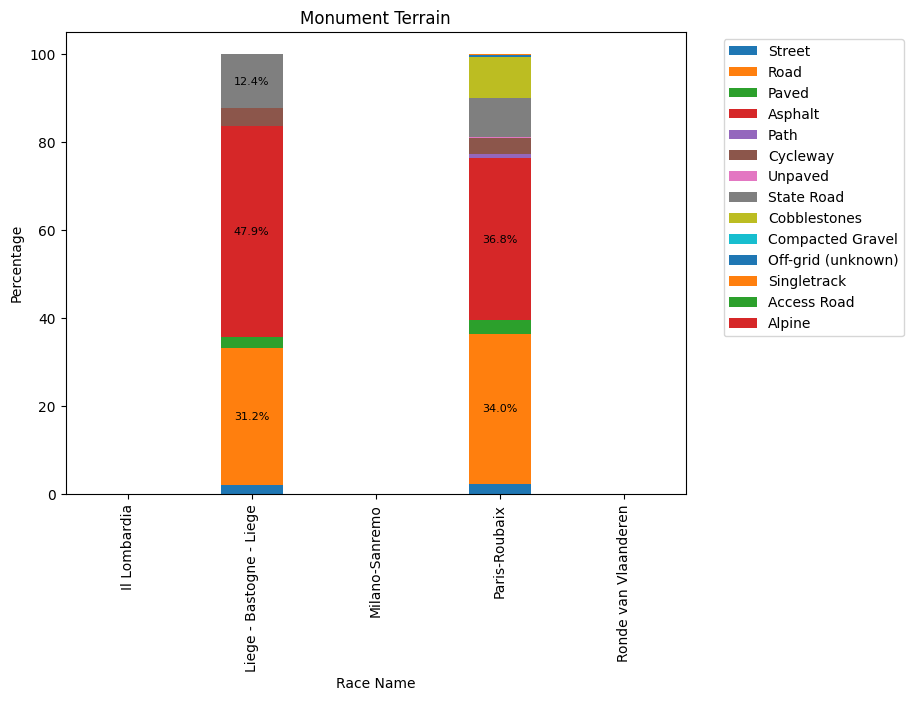

In [109]:
terrain2019 = terrain[terrain['Year'] == 2019]

df = terrain2019[terrain2019['Race Name'].isin(monuments)].set_index('Race Name')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('Monument Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

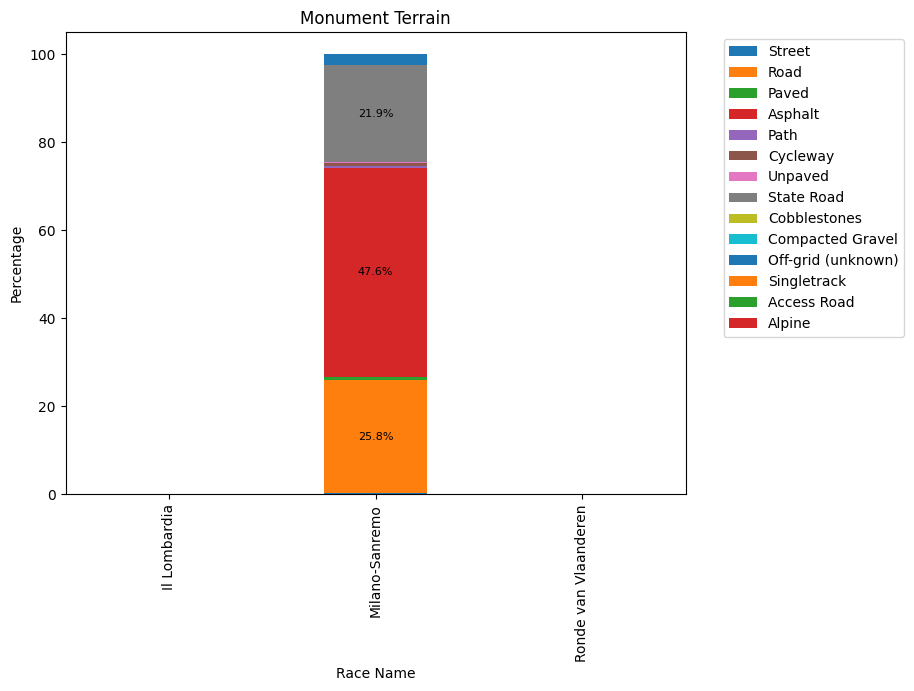

In [111]:
terrain2020 = terrain[terrain['Year'] == 2020]

df = terrain2020[terrain2020['Race Name'].isin(monuments)].set_index('Race Name')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('Monument Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

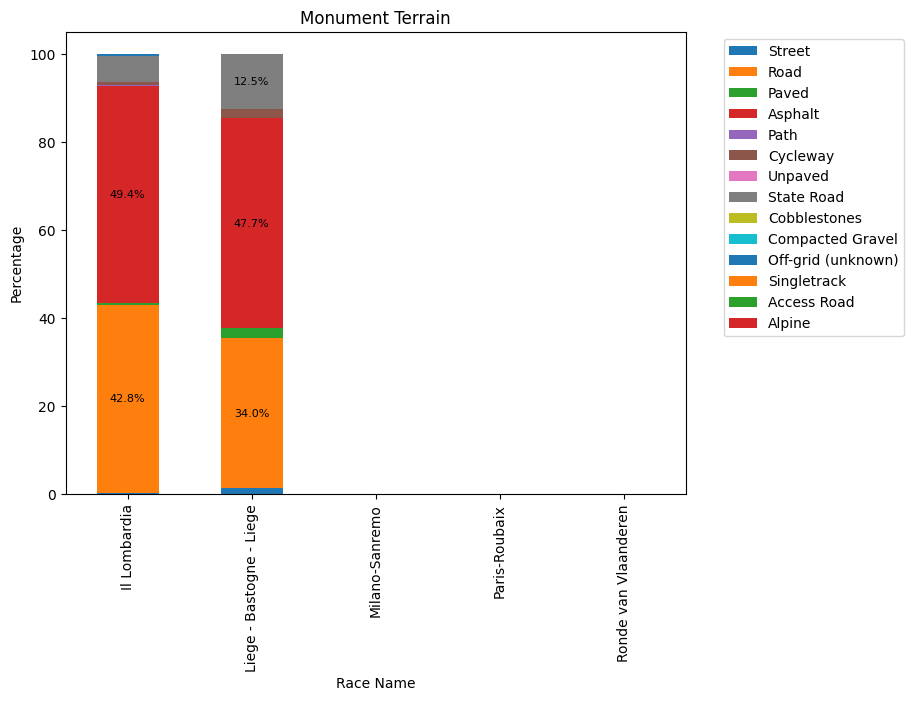

In [113]:
terrain2022 = terrain[terrain['Year'] == 2022]

df = terrain2022[terrain2022['Race Name'].isin(monuments)].set_index('Race Name')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('Monument Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 10:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

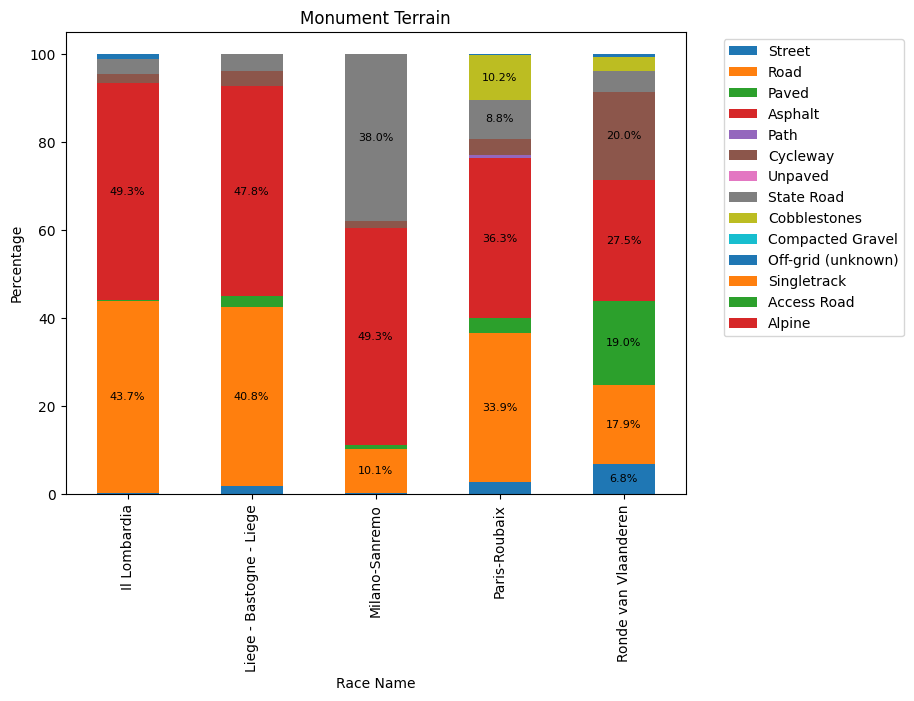

In [115]:
terrain2023 = terrain[terrain['Year'] == 2023]

df = terrain2023[terrain2023['Race Name'].isin(monuments)].set_index('Race Name')[cols]
percentage = df.div(df.sum(axis=1), axis=0) * 100

ax = percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.ylabel('Percentage')
plt.title('Monument Terrain')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (year, row) in enumerate(percentage.iterrows()):
    cumulative = 0
    for col in percentage.columns:
        perc = row[col]
        if perc > 5:  
            ax.text(i, cumulative + perc / 2, f'{perc:.1f}%', 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += perc

plt.show()

In [5]:
import gpxpy
import csv
import os
import glob
import xml.etree.ElementTree as ET

In [123]:
def convert_gpx_to_csv(gpx_file, csv_file):
    tree = ET.parse(gpx_file)
    root = tree.getroot()
    
    ns = {'default': 'http://www.topografix.com/GPX/1/1'}

    with open(csv_file, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(["lat", "lon", "ele", "time"])
        
        for trk in root.findall('default:trk', ns):
            for trkseg in trk.findall('default:trkseg', ns):
                for trkpt in trkseg.findall('default:trkpt', ns):
                    lat = trkpt.get('lat')
                    lon = trkpt.get('lon')
                    ele = trkpt.find('default:ele', ns)
                    time = trkpt.find('default:time', ns)
                    
                    ele_text = ele.text if ele is not None else ""
                    time_text = time.text if time is not None else ""
                    
                    writer.writerow([lat, lon, ele_text, time_text])

def convert_all_gpx_in_folder(folder_path):
    gpx_files = glob.glob(os.path.join(folder_path, "*.gpx"))
    for gpx_file in gpx_files:
        csv_file = os.path.splitext(gpx_file)[0] + ".csv"
        convert_gpx_to_csv(gpx_file, csv_file)
        print(f"Converted {gpx_file} to {csv_file}")

if __name__ == "__main__":
    folder = r"C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\data\monuments gpx"
    convert_all_gpx_in_folder(folder)

Converted C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\data\monuments gpx\2017 Il Lombardia.gpx to C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\data\monuments gpx\2017 Il Lombardia.csv
Converted C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\data\monuments gpx\2017 Liege - Bastogne - Liege.gpx to C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\data\monuments gpx\2017 Liege - Bastogne - Liege.csv
Converted C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\data\monuments gpx\2017 Milano - Sanremo.gpx to C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\data\monuments gpx\2017 Milano - Sanremo.csv
Converted C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\data\monuments gpx\2017 Paris - Roubaix.gpx to C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\data\monuments gpx\2017 Paris - Roubaix.csv
Converted C:\Users\mrmik\OneDr

In [17]:
import gpxpy
import gpxpy.gpx
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import numpy as np
import os

def parse_gpx(file_path):
    with open(file_path, 'r') as gpx_file:
        gpx = gpxpy.parse(gpx_file)

    elevations = []
    distances = []
    total_distance = 0

    prev_point = None
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                elevations.append(point.elevation)
                if prev_point:
                    total_distance += geodesic((prev_point.latitude, prev_point.longitude), 
                                               (point.latitude, point.longitude)).meters
                distances.append(total_distance / 1000)
                prev_point = point

    return distances, elevations

def plot_elevation_profile(distances, elevations, output_filename="elevation_profile.jpg"):
    plt.figure(figsize=(10, 5))
    plt.plot(distances, elevations, color='blue', linewidth=2)
    plt.fill_between(distances, elevations, min(elevations), color='lightblue', alpha=0.5)

    plt.xlabel("Distance (km)")
    plt.ylabel("Elevation (m)")
    plt.title("Elevation Profile")
    plt.grid(True)

    plt.savefig(output_filename, format='jpg', dpi=300)
    plt.close()
    print(f"Elevation profile saved to: {os.path.abspath(output_filename)}")

if __name__ == "__main__":
    gpx_file_path = r"C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\data\monuments gpx\gpxes\2023 Il Lombardia.gpx"
    output_image = "lombardia23_elevation.jpg"
    distances, elevations = parse_gpx(gpx_file_path)
    plot_elevation_profile(distances, elevations, output_image)

Elevation profile saved to: C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\notebooks\lombardia23_elevation.jpg


In [19]:
def parse_gpx(file_path):
    with open(file_path, 'r') as gpx_file:
        gpx = gpxpy.parse(gpx_file)

    elevations = []
    distances = []
    total_distance = 0

    prev_point = None
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                elevations.append(point.elevation)
                if prev_point:
                    total_distance += geodesic((prev_point.latitude, prev_point.longitude), 
                                               (point.latitude, point.longitude)).meters
                distances.append(total_distance / 1000)
                prev_point = point

    return distances, elevations

def plot_elevation_profile(distances, elevations, output_filename="elevation_profile.jpg"):
    plt.figure(figsize=(10, 5))
    plt.plot(distances, elevations, color='blue', linewidth=2)
    plt.fill_between(distances, elevations, min(elevations), color='lightblue', alpha=0.5)

    plt.xlabel("Distance (km)")
    plt.ylabel("Elevation (m)")
    plt.title("Elevation Profile")
    plt.grid(True)

    plt.savefig(output_filename, format='jpg', dpi=300)
    plt.close()
    print(f"Elevation profile saved to: {os.path.abspath(output_filename)}")

if __name__ == "__main__":
    gpx_file_path = r"C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\data\monuments gpx\gpxes\2023 Liege-Bastogne-Liege.gpx"
    output_image = "liege23_elevation.jpg"
    distances, elevations = parse_gpx(gpx_file_path)
    plot_elevation_profile(distances, elevations, output_image)

Elevation profile saved to: C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\notebooks\liege23_elevation.jpg


In [21]:
def parse_gpx(file_path):
    with open(file_path, 'r') as gpx_file:
        gpx = gpxpy.parse(gpx_file)

    elevations = []
    distances = []
    total_distance = 0

    prev_point = None
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                elevations.append(point.elevation)
                if prev_point:
                    total_distance += geodesic((prev_point.latitude, prev_point.longitude), 
                                               (point.latitude, point.longitude)).meters
                distances.append(total_distance / 1000)
                prev_point = point

    return distances, elevations

def plot_elevation_profile(distances, elevations, output_filename="elevation_profile.jpg"):
    plt.figure(figsize=(10, 5))
    plt.plot(distances, elevations, color='blue', linewidth=2)
    plt.fill_between(distances, elevations, min(elevations), color='lightblue', alpha=0.5)

    plt.xlabel("Distance (km)")
    plt.ylabel("Elevation (m)")
    plt.title("Elevation Profile")
    plt.grid(True)

    plt.savefig(output_filename, format='jpg', dpi=300)
    plt.close()
    print(f"Elevation profile saved to: {os.path.abspath(output_filename)}")

if __name__ == "__main__":
    gpx_file_path = r"C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\data\monuments gpx\gpxes\2023 Milano-Sanremo.gpx"
    output_image = "sanremo23_elevation.jpg"
    distances, elevations = parse_gpx(gpx_file_path)
    plot_elevation_profile(distances, elevations, output_image)

Elevation profile saved to: C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\notebooks\sanremo23_elevation.jpg


In [23]:
def parse_gpx(file_path):
    with open(file_path, 'r') as gpx_file:
        gpx = gpxpy.parse(gpx_file)

    elevations = []
    distances = []
    total_distance = 0

    prev_point = None
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                elevations.append(point.elevation)
                if prev_point:
                    total_distance += geodesic((prev_point.latitude, prev_point.longitude), 
                                               (point.latitude, point.longitude)).meters
                distances.append(total_distance / 1000)
                prev_point = point

    return distances, elevations

def plot_elevation_profile(distances, elevations, output_filename="elevation_profile.jpg"):
    plt.figure(figsize=(10, 5))
    plt.plot(distances, elevations, color='blue', linewidth=2)
    plt.fill_between(distances, elevations, min(elevations), color='lightblue', alpha=0.5)

    plt.xlabel("Distance (km)")
    plt.ylabel("Elevation (m)")
    plt.title("Elevation Profile")
    plt.grid(True)

    plt.savefig(output_filename, format='jpg', dpi=300)
    plt.close()
    print(f"Elevation profile saved to: {os.path.abspath(output_filename)}")

if __name__ == "__main__":
    gpx_file_path = r"C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\data\monuments gpx\gpxes\2023 Paris-Roubaix.gpx"
    output_image = "roubaix23_elevation.jpg"
    distances, elevations = parse_gpx(gpx_file_path)
    plot_elevation_profile(distances, elevations, output_image)

Elevation profile saved to: C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\notebooks\roubaix23_elevation.jpg


In [25]:
def parse_gpx(file_path):
    with open(file_path, 'r') as gpx_file:
        gpx = gpxpy.parse(gpx_file)

    elevations = []
    distances = []
    total_distance = 0

    prev_point = None
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                elevations.append(point.elevation)
                if prev_point:
                    total_distance += geodesic((prev_point.latitude, prev_point.longitude), 
                                               (point.latitude, point.longitude)).meters
                distances.append(total_distance / 1000)
                prev_point = point

    return distances, elevations

def plot_elevation_profile(distances, elevations, output_filename="elevation_profile.jpg"):
    plt.figure(figsize=(10, 5))
    plt.plot(distances, elevations, color='blue', linewidth=2)
    plt.fill_between(distances, elevations, min(elevations), color='lightblue', alpha=0.5)

    plt.xlabel("Distance (km)")
    plt.ylabel("Elevation (m)")
    plt.title("Elevation Profile")
    plt.grid(True)

    plt.savefig(output_filename, format='jpg', dpi=300)
    plt.close()
    print(f"Elevation profile saved to: {os.path.abspath(output_filename)}")

if __name__ == "__main__":
    gpx_file_path = r"C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\data\monuments gpx\gpxes\2023 Ronde van Vlaanderen - Tour des Flandres.gpx"
    output_image = "ronde23_elevation.jpg"
    distances, elevations = parse_gpx(gpx_file_path)
    plot_elevation_profile(distances, elevations, output_image)

Elevation profile saved to: C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\notebooks\ronde23_elevation.jpg


In [7]:
window = pd.read_excel(r"C:\Users\mrmik\OneDrive\Desktop\NSS\Python\Projects\Cycling_Capstone\notebooks\window.xlsx")